In [84]:
library(data.table)
library(ggplot2)

In [85]:
cellbender_dir_anna = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/cellbender_output_smaller_learning_rate/"
cellbender_dir_blake = "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/cellbender/output/smaller_learning_rate/"

In [86]:
cellranger_dir_gwccg = "/directflow/GWCCGPipeline/projects/deliver/GIMR_GWCCG_230201_JOSPOW_10x_Tenk10k/"
cellranger_dir_sccg = "/directflow/SCCGGroupShare/projects/data/experimental_data/projects/TenK10K/GencodeV44/"

In [90]:
all_transferred_samples = list.files(cellranger_dir_sccg, pattern = "S.")
length(all_transferred_samples)
# all_transferred_samples

[1] 257

In [87]:
samples_anna = list.files(cellbender_dir_anna, pattern = "S.")
length(samples_anna)
# samples_anna

[1] 225

In [88]:
samples_blake = list.files(cellbender_dir_blake, pattern = "S.")
length(samples_blake)
# samples_blake

[1] 76

In [112]:
samples = unique(c(samples_anna, samples_blake))
samples = samples[order(samples)]
# samples

In [113]:
cellranger_folders = list.files(cellranger_dir_gwccg, pattern = "tenk10k_gencode44")
cellranger_folders

[1] "231013_tenk10k_gencode44" "231213_tenk10k_gencode44"
 [3] "231214_tenk10k_gencode44" "240108_tenk10k_gencode44"
 [5] "240112_tenk10k_gencode44" "240115_tenk10k_gencode44"
 [7] "240116_tenk10k_gencode44" "240119_tenk10k_gencode44"
 [9] "240214_tenk10k_gencode44" "240223_tenk10k_gencode44"
[11] "240319_tenk10k_gencode44" "240501_tenk10k_gencode44"
[13] "240524_tenk10k_gencode44" "240530_tenk10k_gencode44"

In [114]:
df_to_plot = data.frame()
for (sample in samples){
    cellbender_metrics_file1 = paste0(cellbender_dir_anna, sample, "/cellbender_output_metrics.csv")
    cellbender_metrics_file2 = paste0(cellbender_dir_blake, sample, "/cellbender_output_metrics.csv")
    if (file.exists(cellbender_metrics_file1)){
        cellbender_df = fread(cellbender_metrics_file1)
    } else {
        if (file.exists(cellbender_metrics_file2)){
            cellbender_df = fread(cellbender_metrics_file2)
        }
    }
    cellbender_ncells = cellbender_df[cellbender_df$V1 == "found_cells","V2"]$V2
    if (sample %in% all_transferred_samples){
        cellranger_metrics_file = paste0(cellranger_dir_sccg,sample,"/outs/metrics_summary.csv")
        cellranger_df = fread(cellranger_metrics_file)
    } else { 
        for (cellranger_folder in cellranger_folders){
            cellranger_metrics_file = paste0(cellranger_dir_gwccg,cellranger_folder,"/cellranger_outs/",sample,"/cellranger_count/",sample,"/outs/metrics_summary.csv")
            if (file.exists(cellranger_metrics_file)){cellranger_df = fread(cellranger_metrics_file)}
        }
    }
    colnames(cellranger_df) = gsub(" ","_",colnames(cellranger_df))
    cellranger_ncells = as.numeric(gsub(",","",cellranger_df$Estimated_Number_of_Cells))
#     print(c(sample, cellranger_ncells))
    df_to_plot = rbind(df_to_plot, data.frame(sample=sample, 
                                              cellbender_ncells=cellbender_ncells,
                                              cellranger_ncells=cellranger_ncells))
}
df_to_plot$pool = gsub("a","",gsub("b","",gsub("c","",df_to_plot$sample)))

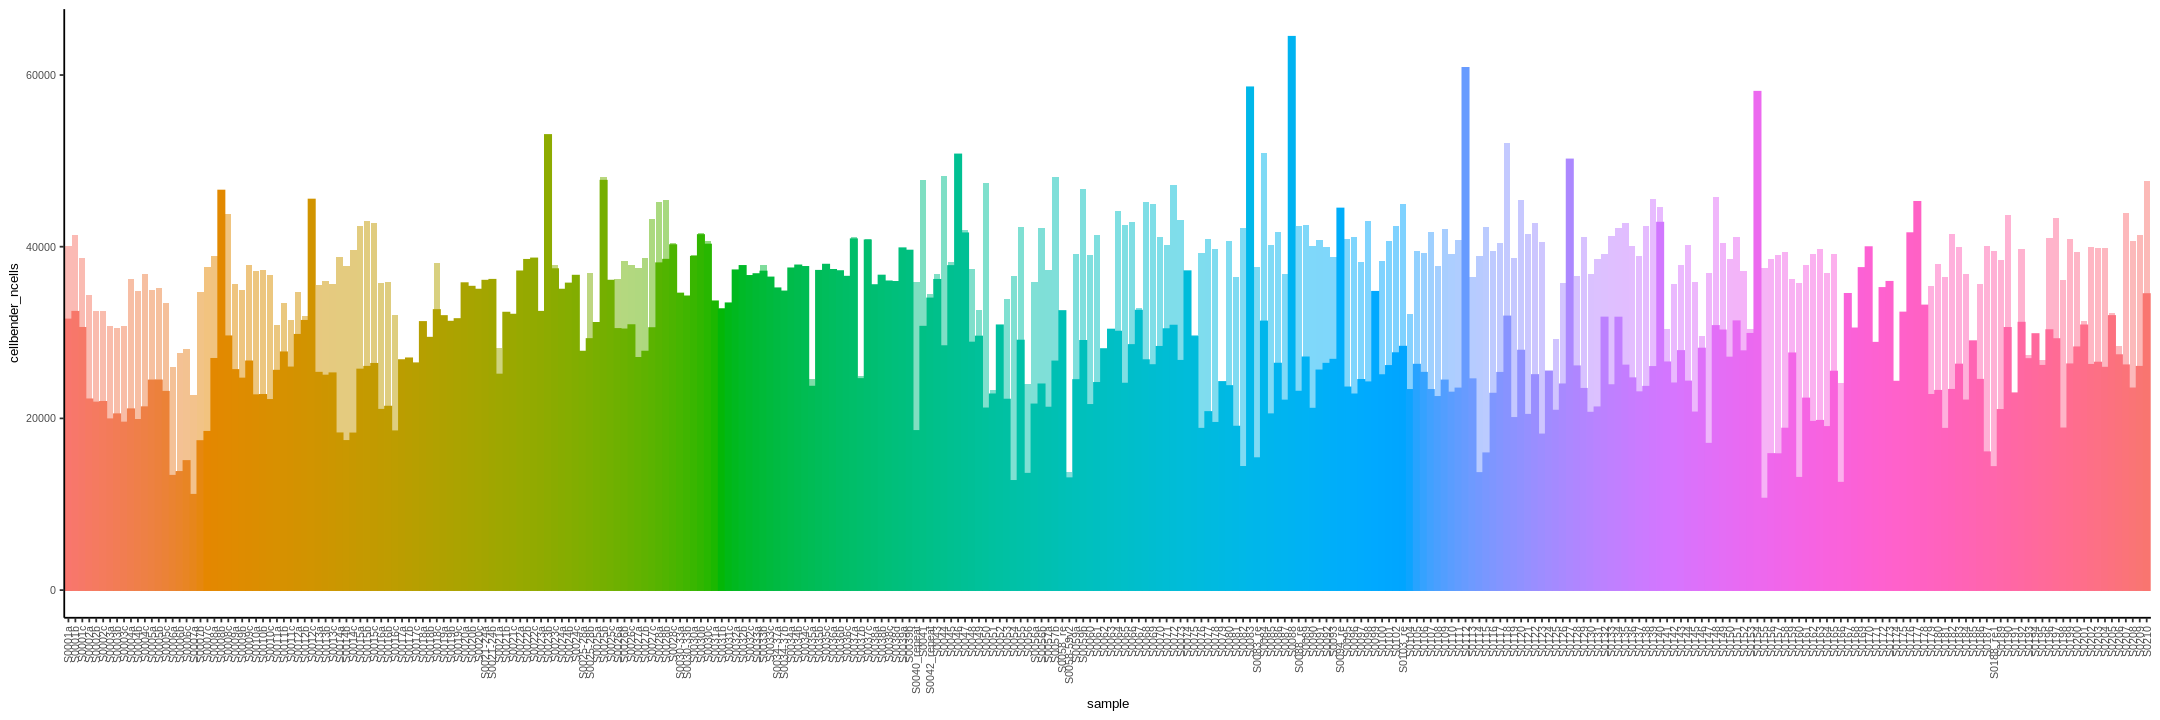

In [140]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_to_plot, aes(x=sample, y=cellbender_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellranger_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=8))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p

In [124]:
df_to_plot1 = df_to_plot[1:122,]
df_to_plot2 = df_to_plot[123:240,]
df_to_plot3 = df_to_plot[241:nrow(df_to_plot),]

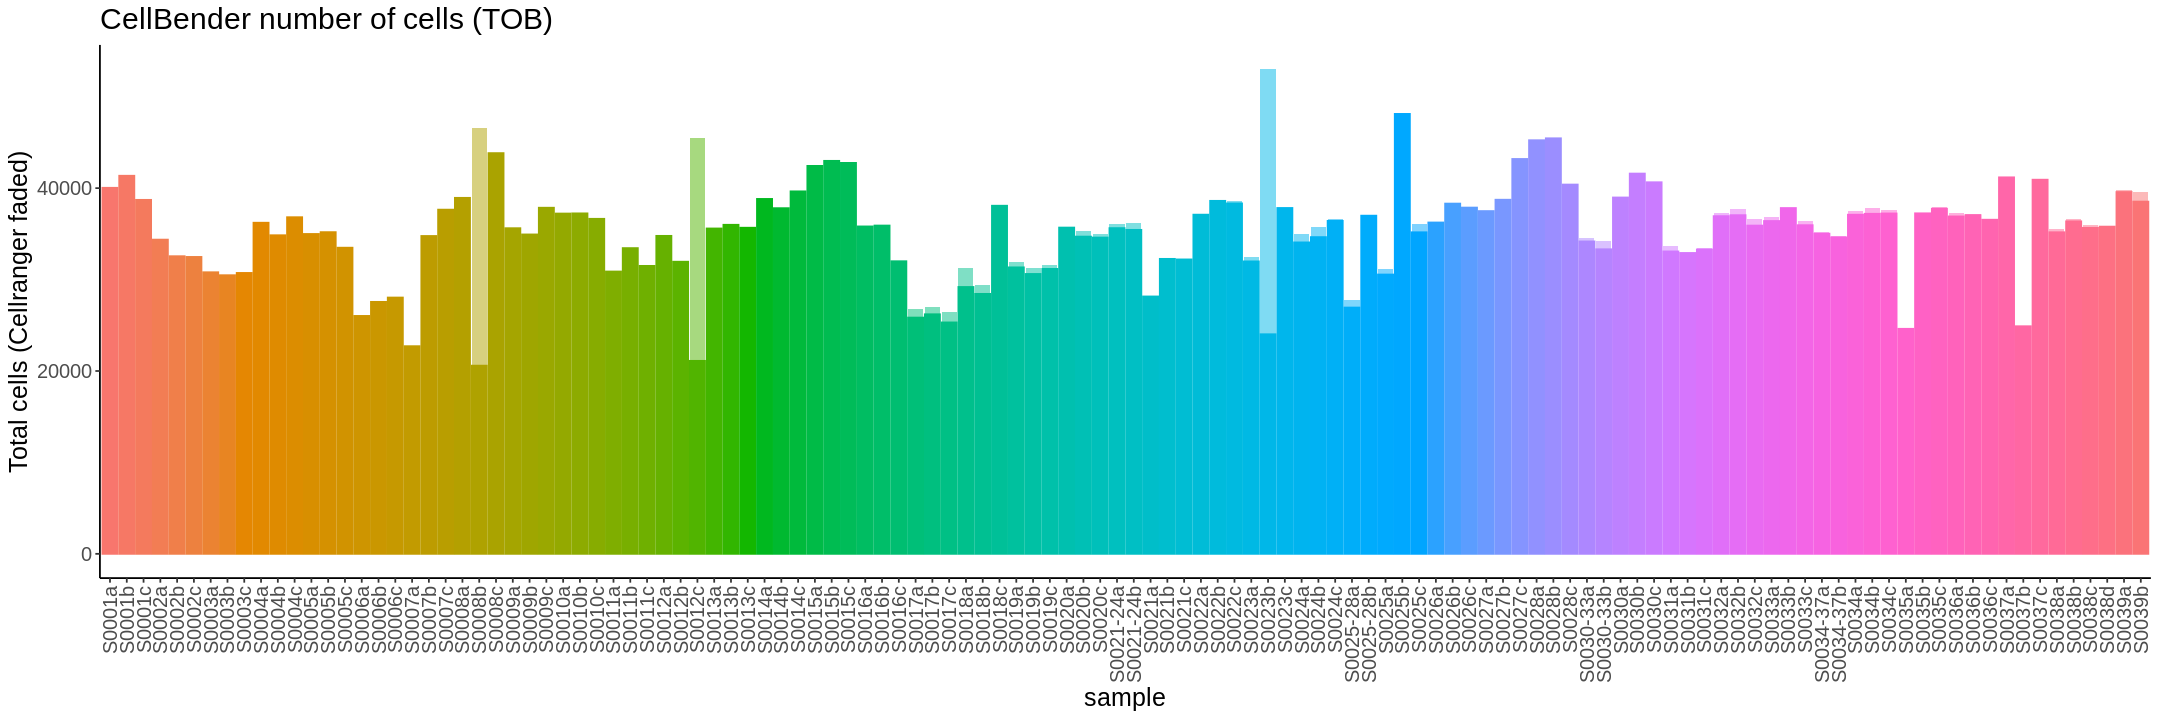

In [137]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_to_plot1, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellbender_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p1 = p + ylab("Total cells (Cellranger faded)") + ggtitle("CellBender number of cells (TOB)")
p1

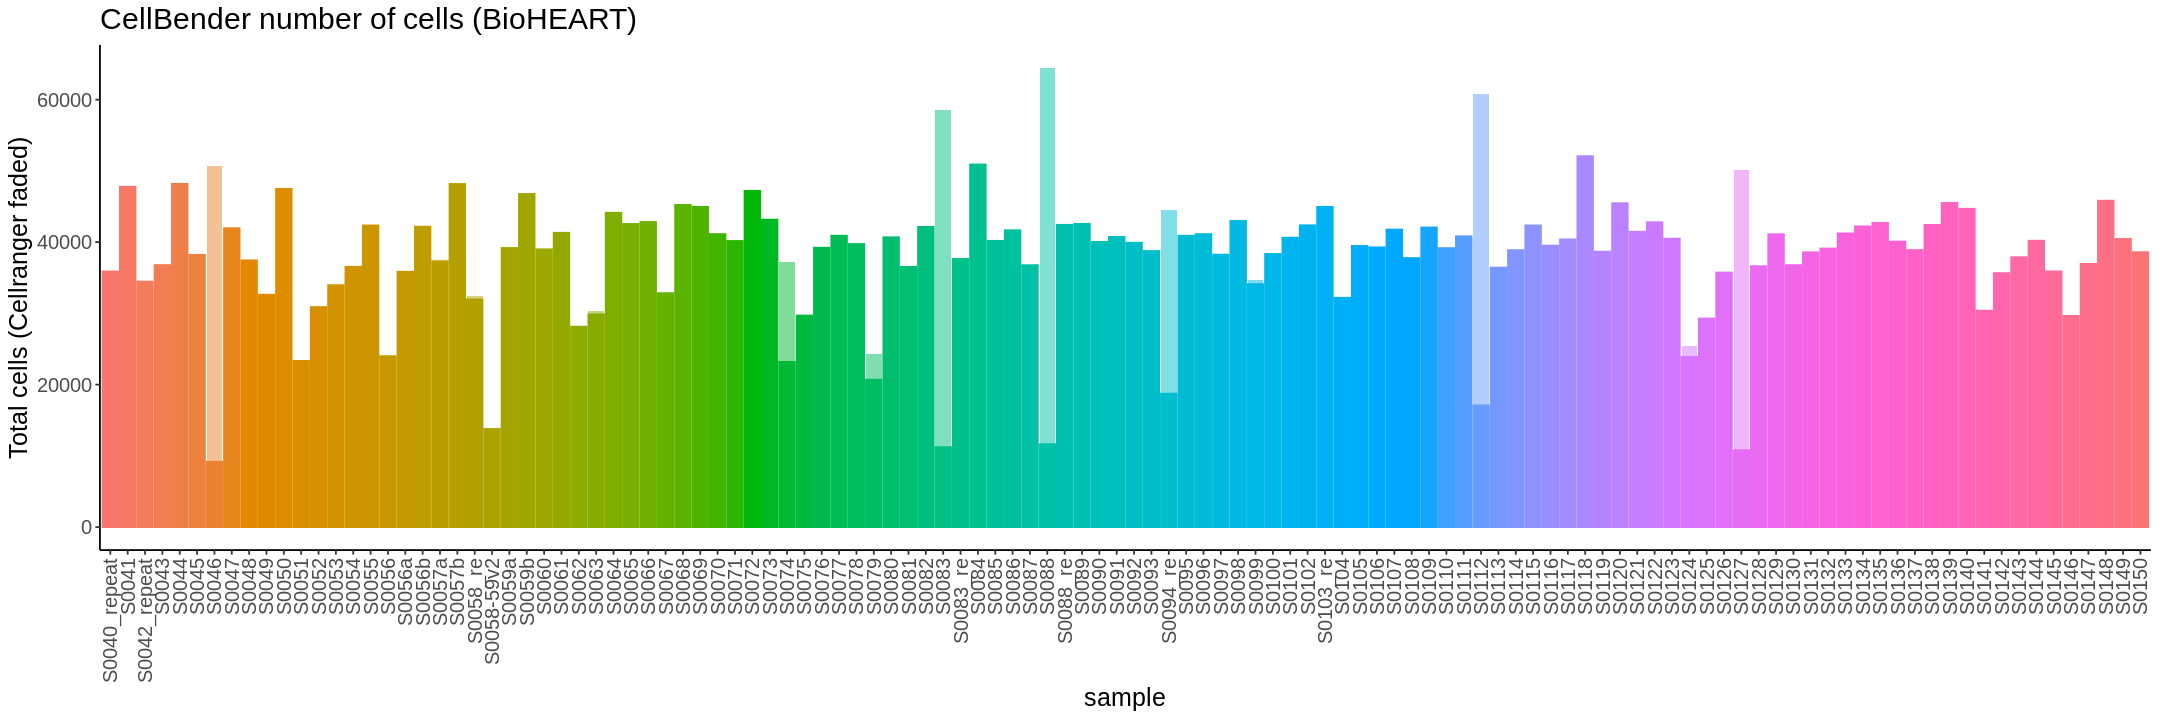

In [138]:
p = ggplot(df_to_plot2, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellbender_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p2 = p + ylab("Total cells (Cellranger faded)") + ggtitle("CellBender number of cells (BioHEART)")
p2

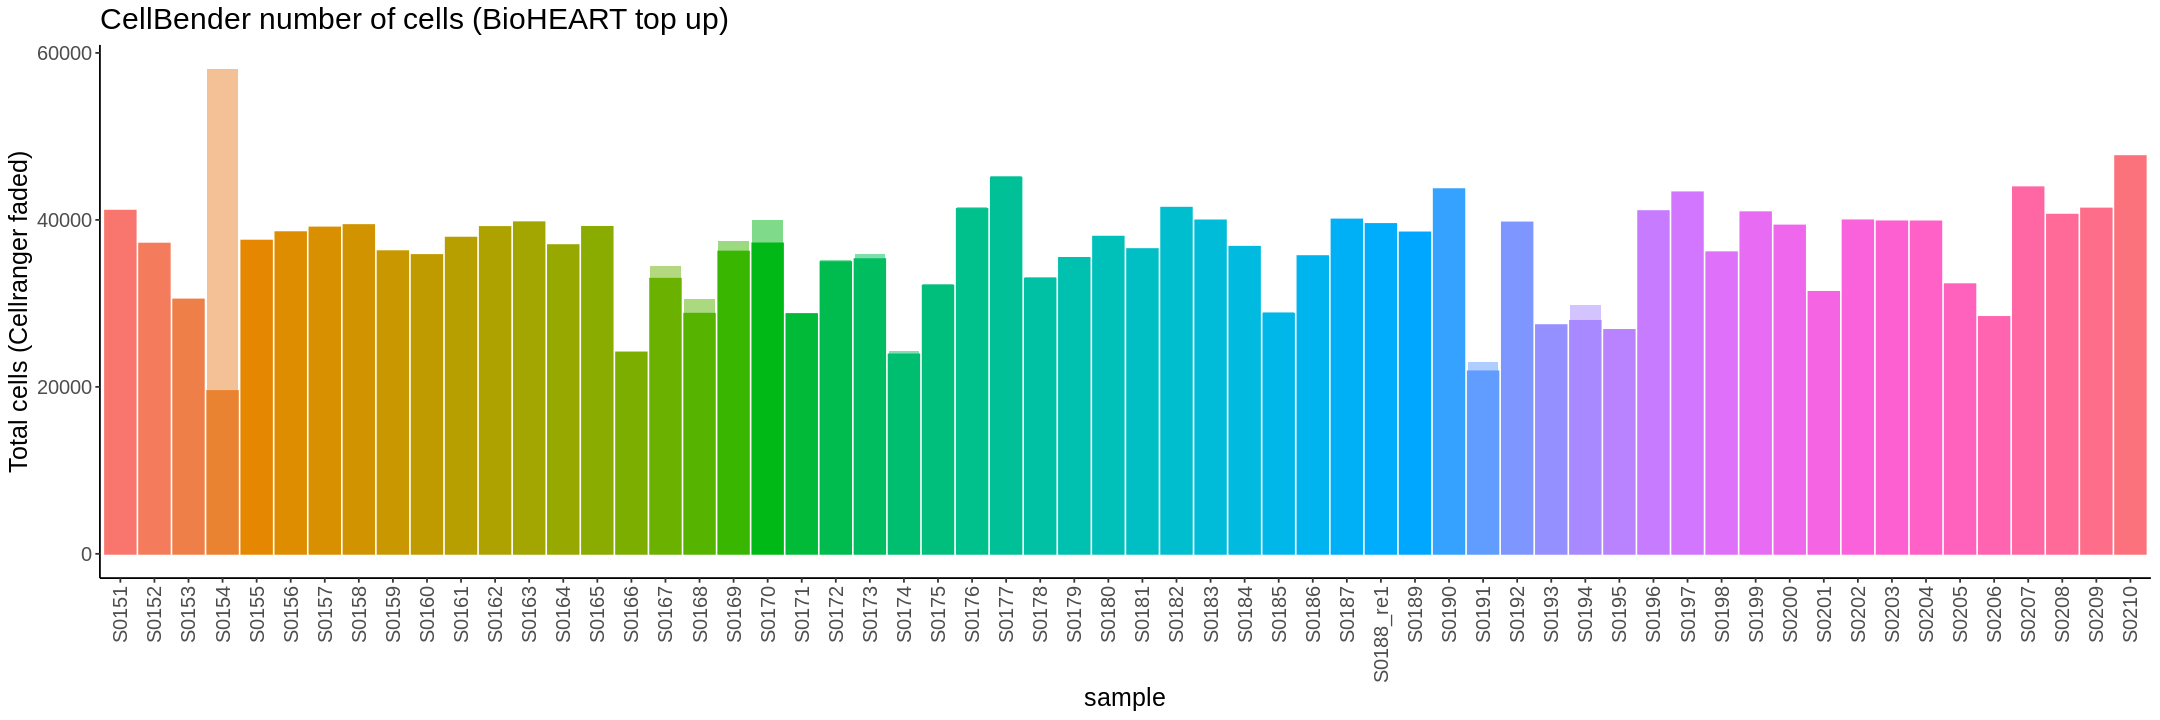

In [139]:
p = ggplot(df_to_plot3, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellbender_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p3 = p + ylab("Total cells (Cellranger faded)") + ggtitle("CellBender number of cells (BioHEART top up)")
p3

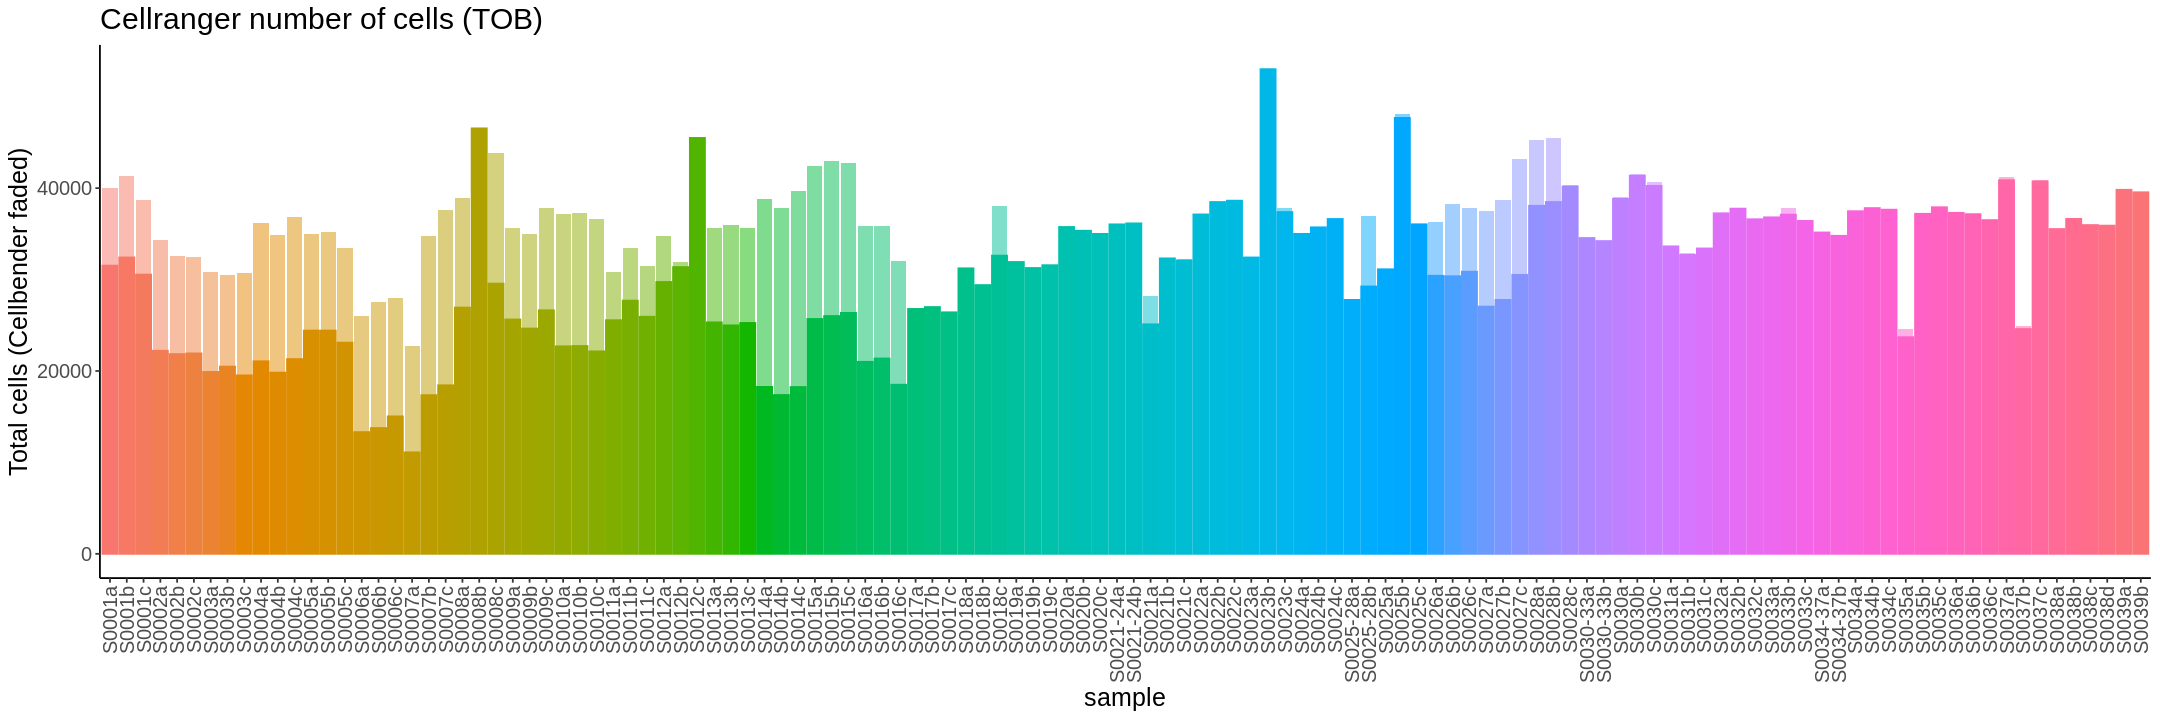

In [134]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_to_plot1, aes(x=sample, y=cellbender_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellranger_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p1 = p + ylab("Total cells (Cellbender faded)") + ggtitle("Cellranger number of cells (TOB)")
p1

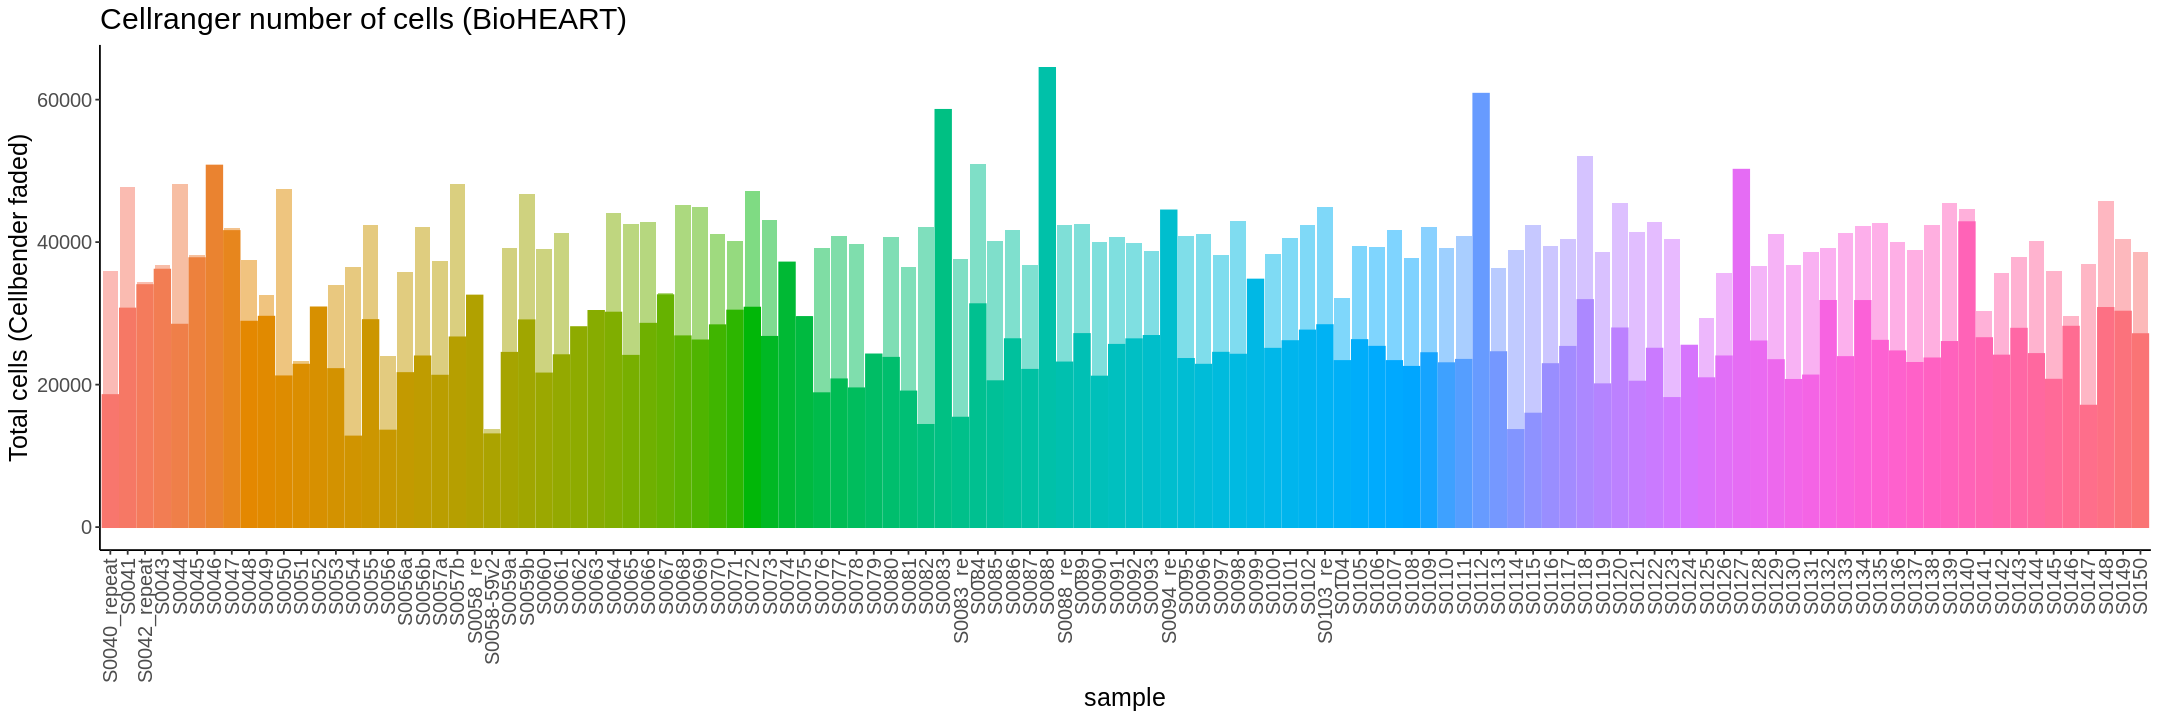

In [135]:
p = ggplot(df_to_plot2, aes(x=sample, y=cellbender_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellranger_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p2 = p + ylab("Total cells (Cellbender faded)") + ggtitle("Cellranger number of cells (BioHEART)")
p2

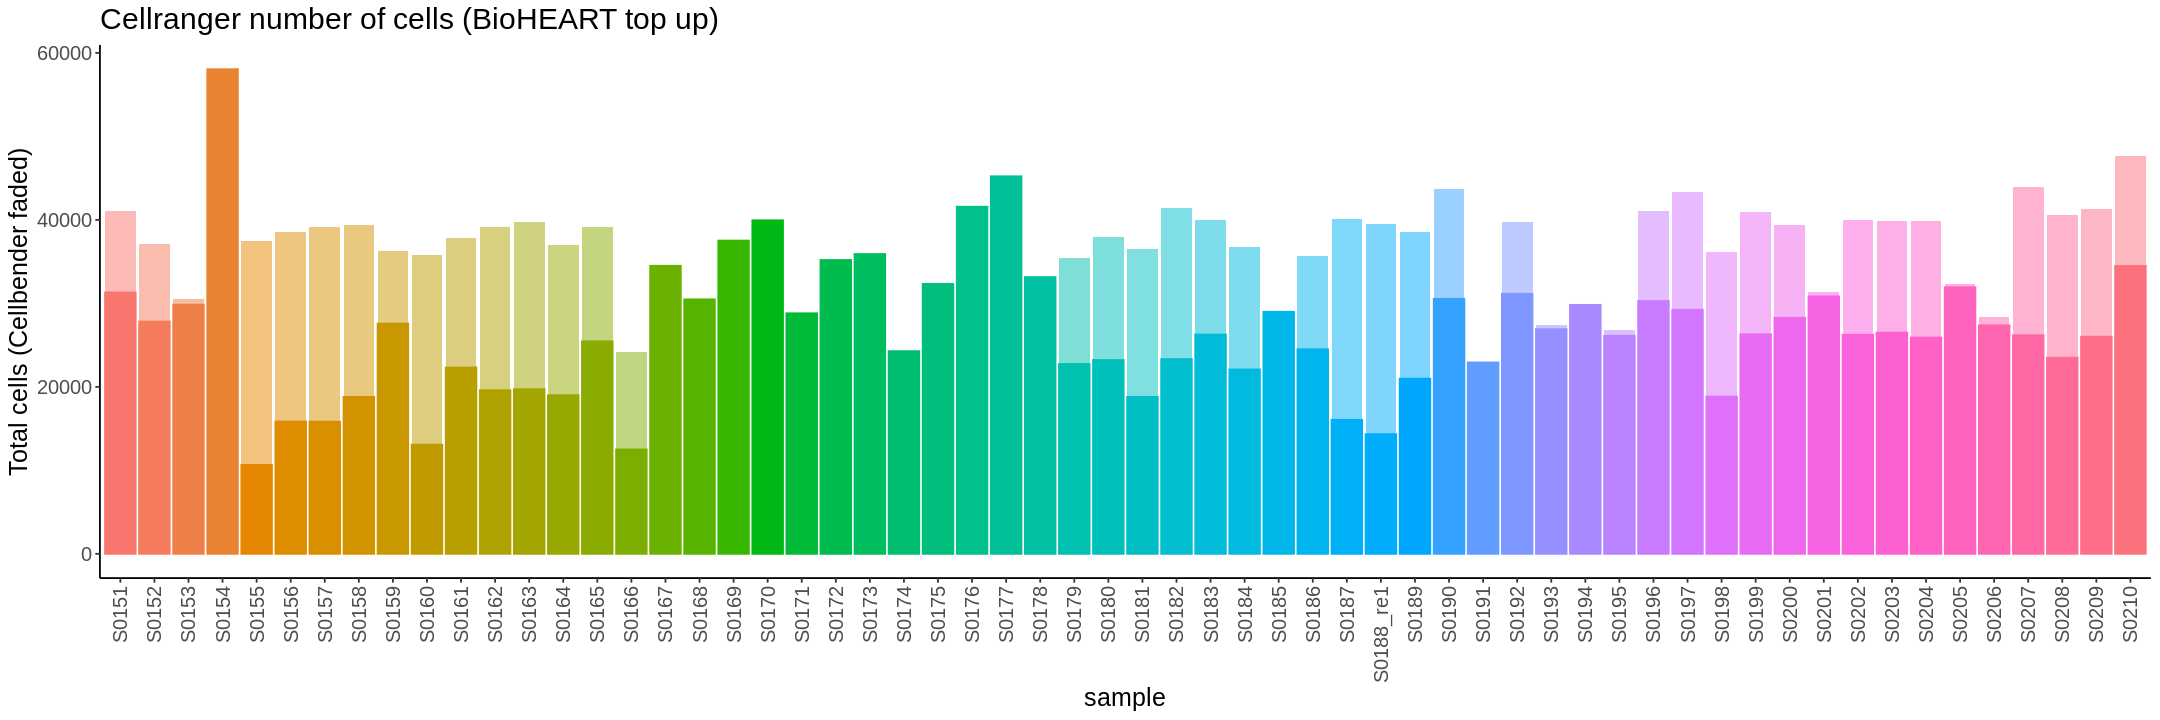

In [136]:
p = ggplot(df_to_plot3, aes(x=sample, y=cellbender_ncells, fill=sample)) + geom_bar(stat = "identity", alpha = 0.5)
p = p + geom_bar(aes(x=sample, y=cellranger_ncells, col=sample),stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p3 = p + ylab("Total cells (Cellbender faded)") + ggtitle("Cellranger number of cells (BioHEART top up)")
p3